<h1> <center>Automated Bayesian Evidential Learning for Geological UQ </center> </h1> 
<p>***Author***:  David Zhen Yin   
<p>***Contact***: [yinzhen@stanford.edu](mailto:yinzhen@stanford.edu) 
<p>***Date***:    Apr 20, 2019
<p>This is the Automated BEL Python package. The code is demontrated by the example of UQ for reservoir thickness model and storage volume prediction.
<img src = "source_code/img/bel_workflow.jpg" title="Bayesian Evidential Learning workflow" style="width: 500px;"/>
<center>Figure. The concept of Bayesian Evidential Learning </center>  

<p> The structure of the Auto-BEL is shown in the figure below
<p><img src = "source_code/img/dataset_struture.jpg" title="Bayesian Evidential Learning workflow" style="width: 450px;"/>
<center>Figure. Structure of Auto-BEL </center>  
    

# Environment settings

##### Prerequisites
To enable the Auto-BEL, the users need to have the following Python modules & R modules installed (most of them should be installed already when installing Python using Anaconda) :

* datetime
* gc
* matplotlib
* numpy
* os
* pandas
* random
* seaborn
* scipy
* skfmm
* sklearn
* tqdm

##### Initial Setting

In [1]:
from source_code.Auto_BEL import Auto_BEL
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Define input parameters for Auto-BEL

In [2]:
# model_names: names of the input models, type - list
model_names =['thickness']
# Define model type: 1 - Continous; 2 - Categorical
model_types = [1]
# Define model dimensions in x, y, z directions. 
x_dim, y_dim, z_dim = 200, 100, 1
# Define model horizontal resolution
grid_h_resolution = 250*250
# Provide directory of the prior models
pri_m_samples_dir = 'input/prior_samples/'
# Provide sample size of the prior models
samples_size = 250
# Provide directory of the global parameters
mgl = 'input/thickness_mgl.txt'
# Provide directory of the data observation
dobs_file = 'input/thickness_obs'

# Run Auto-BEL

1. Initialization
  
2. Prior prediction
  
3. Dimension reduction of model and data
2019-11-03 21:28:41:882981
2019-11-03 21:28:42:353721
QC of the model eigen images
  
4. Prior falsification
Robust Mahalanobis Distance of d_obs =  1.931
95th Quantile of Robust Mahalanobis Distance is 4.861
*******************************
>> "thickness" Prior CANNOT be falsified!
*******************************
  
5. Global Sensitivity anlaysis-DGSA


100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:08<00:00, 342.81it/s]


  
6. Unceratinty reduction
  
6.1 QC model and data statistical relationships


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.26s/it]


  
6.2 Canonical Corrleation Analysis
  
6.3 Parametric Gaussian Regression & posterior sampling
  
6.4 Reconstruct posterior model
  
6.5. QC posterior results
  
6.5.1 Plot posterior models
  
6.5.2 Calculate posterior prediction
  
AUTO-BEL completed :-)!


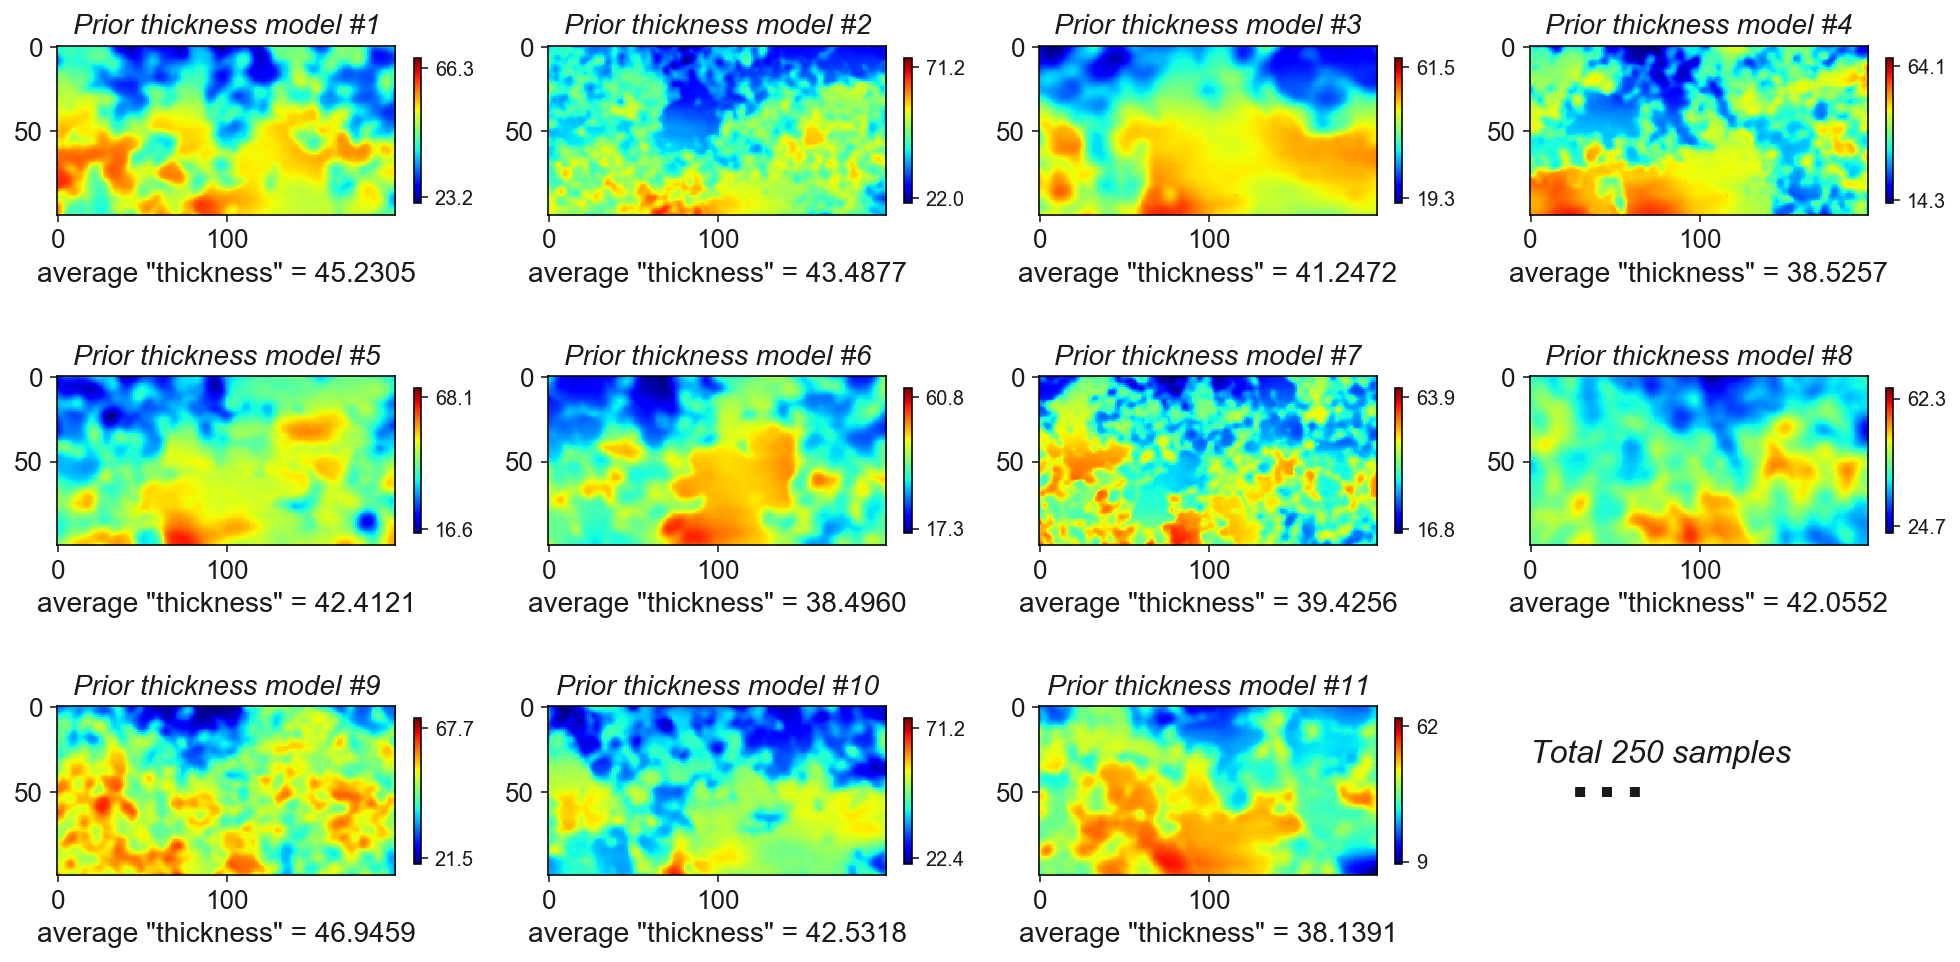

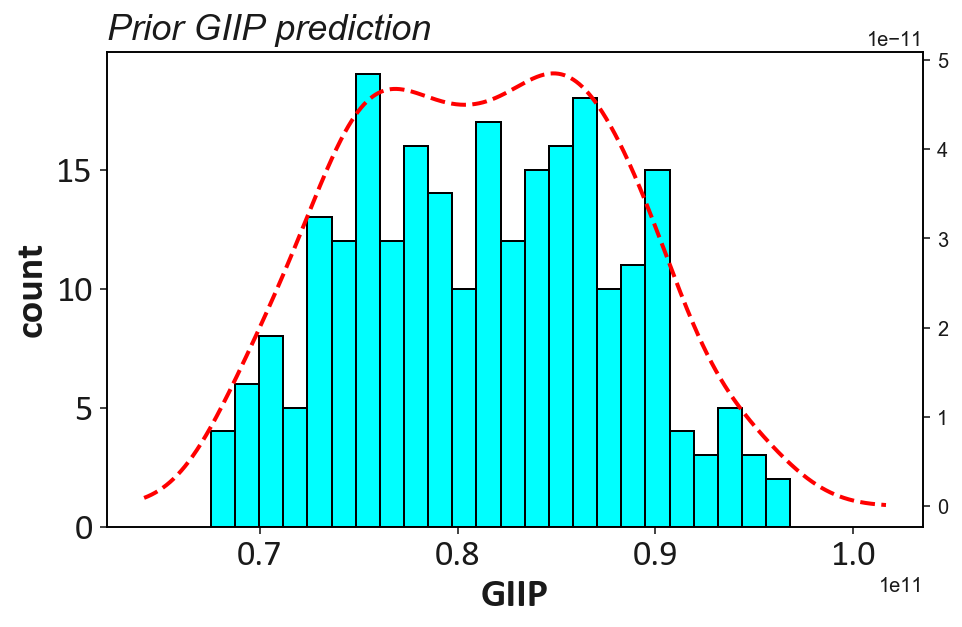

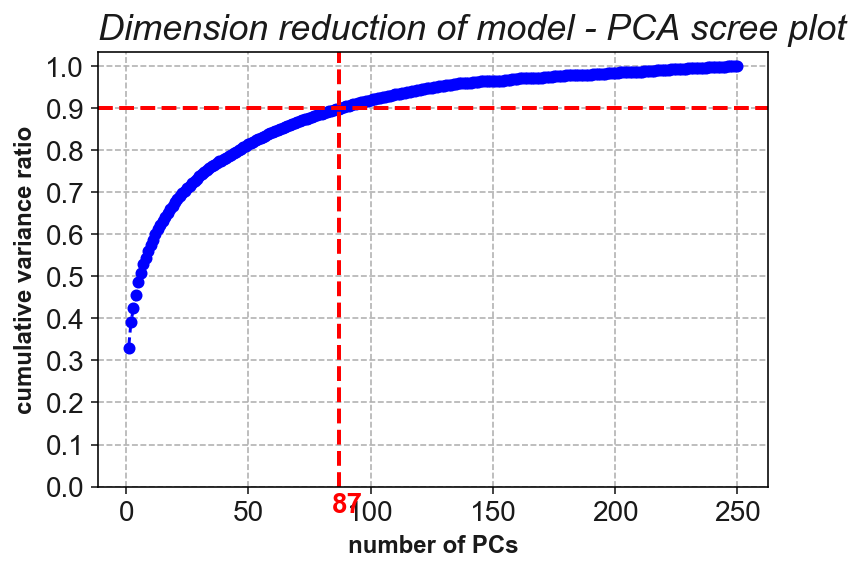

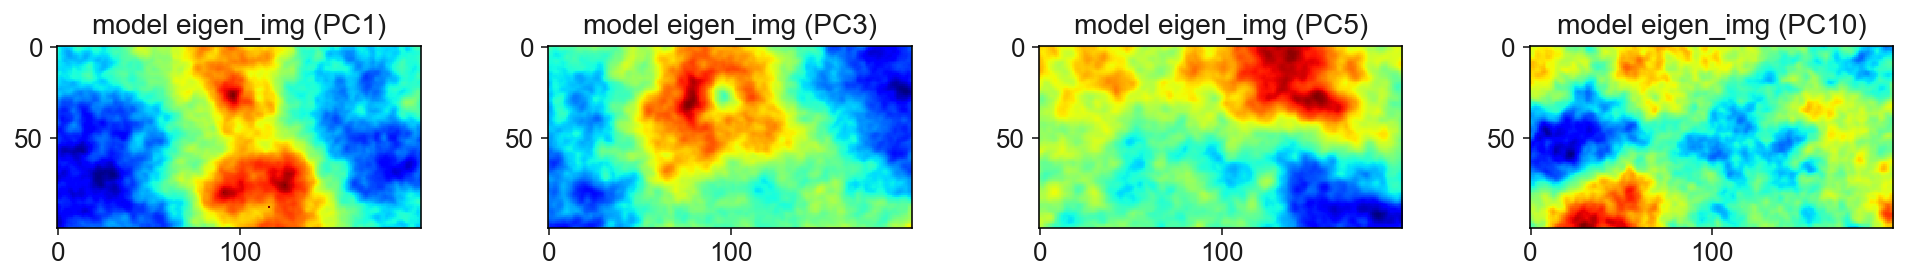

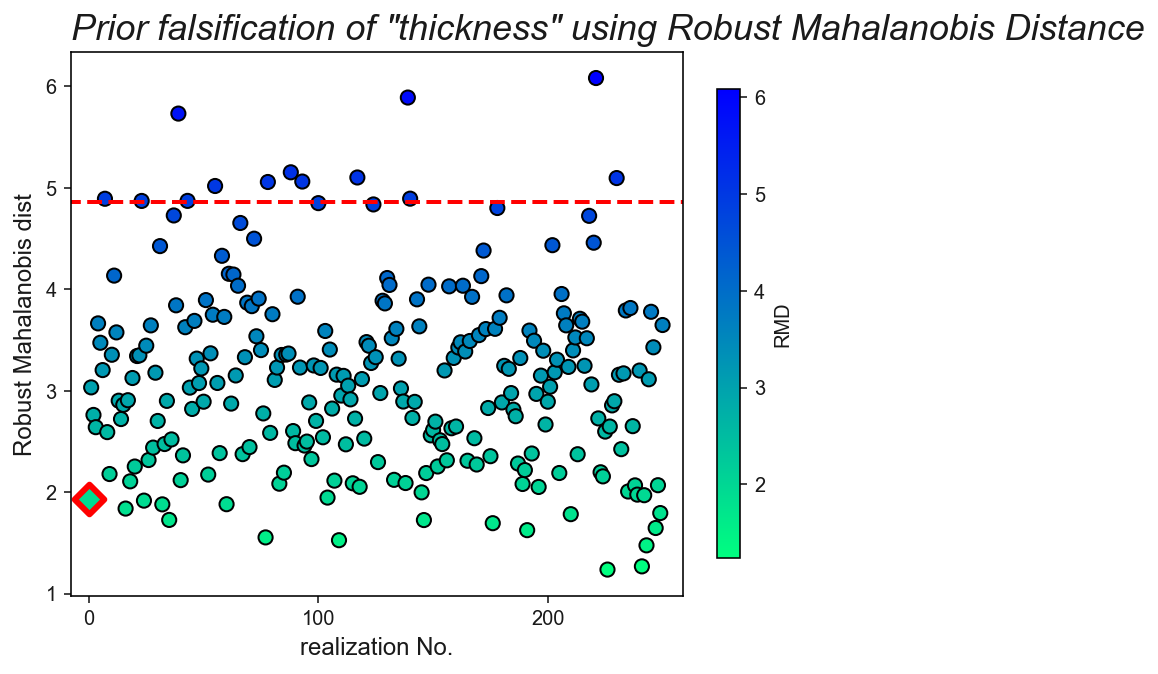

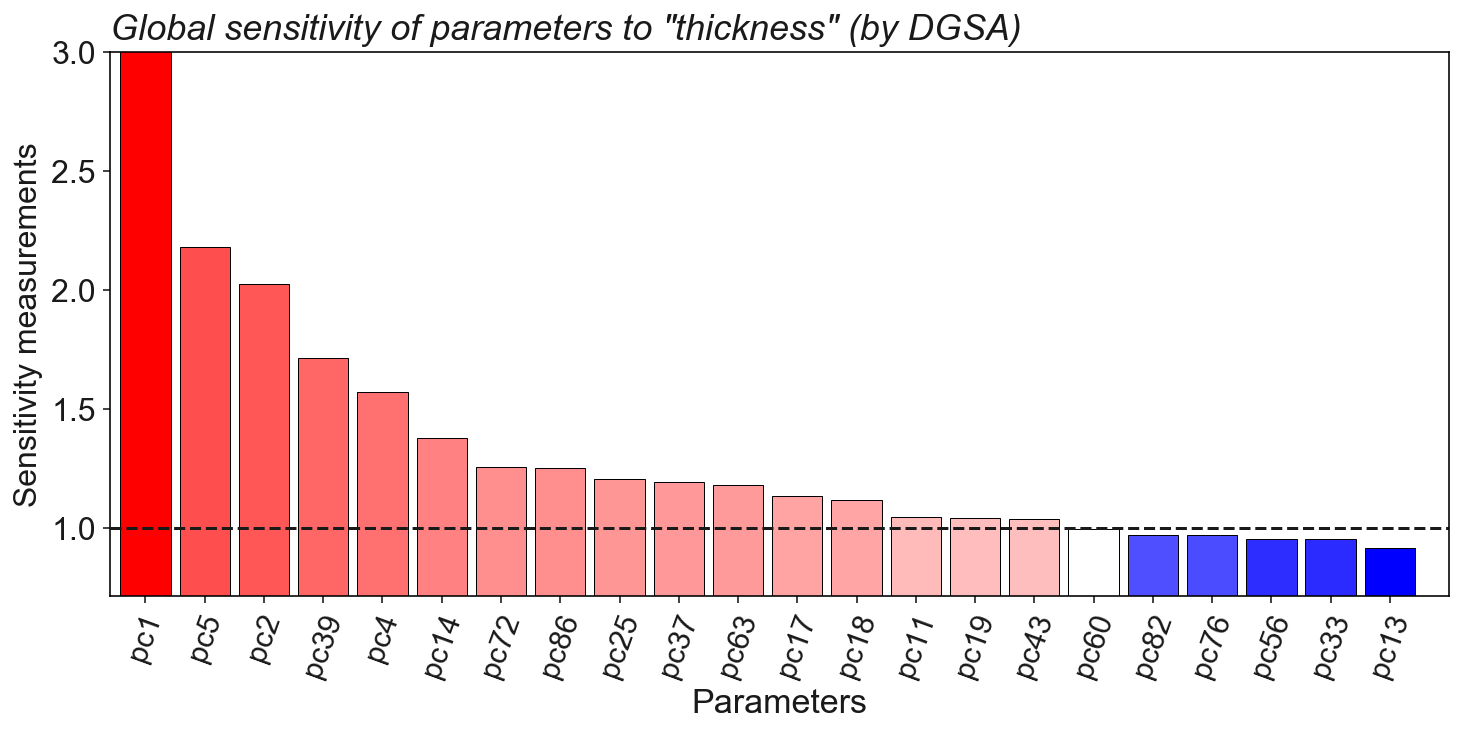

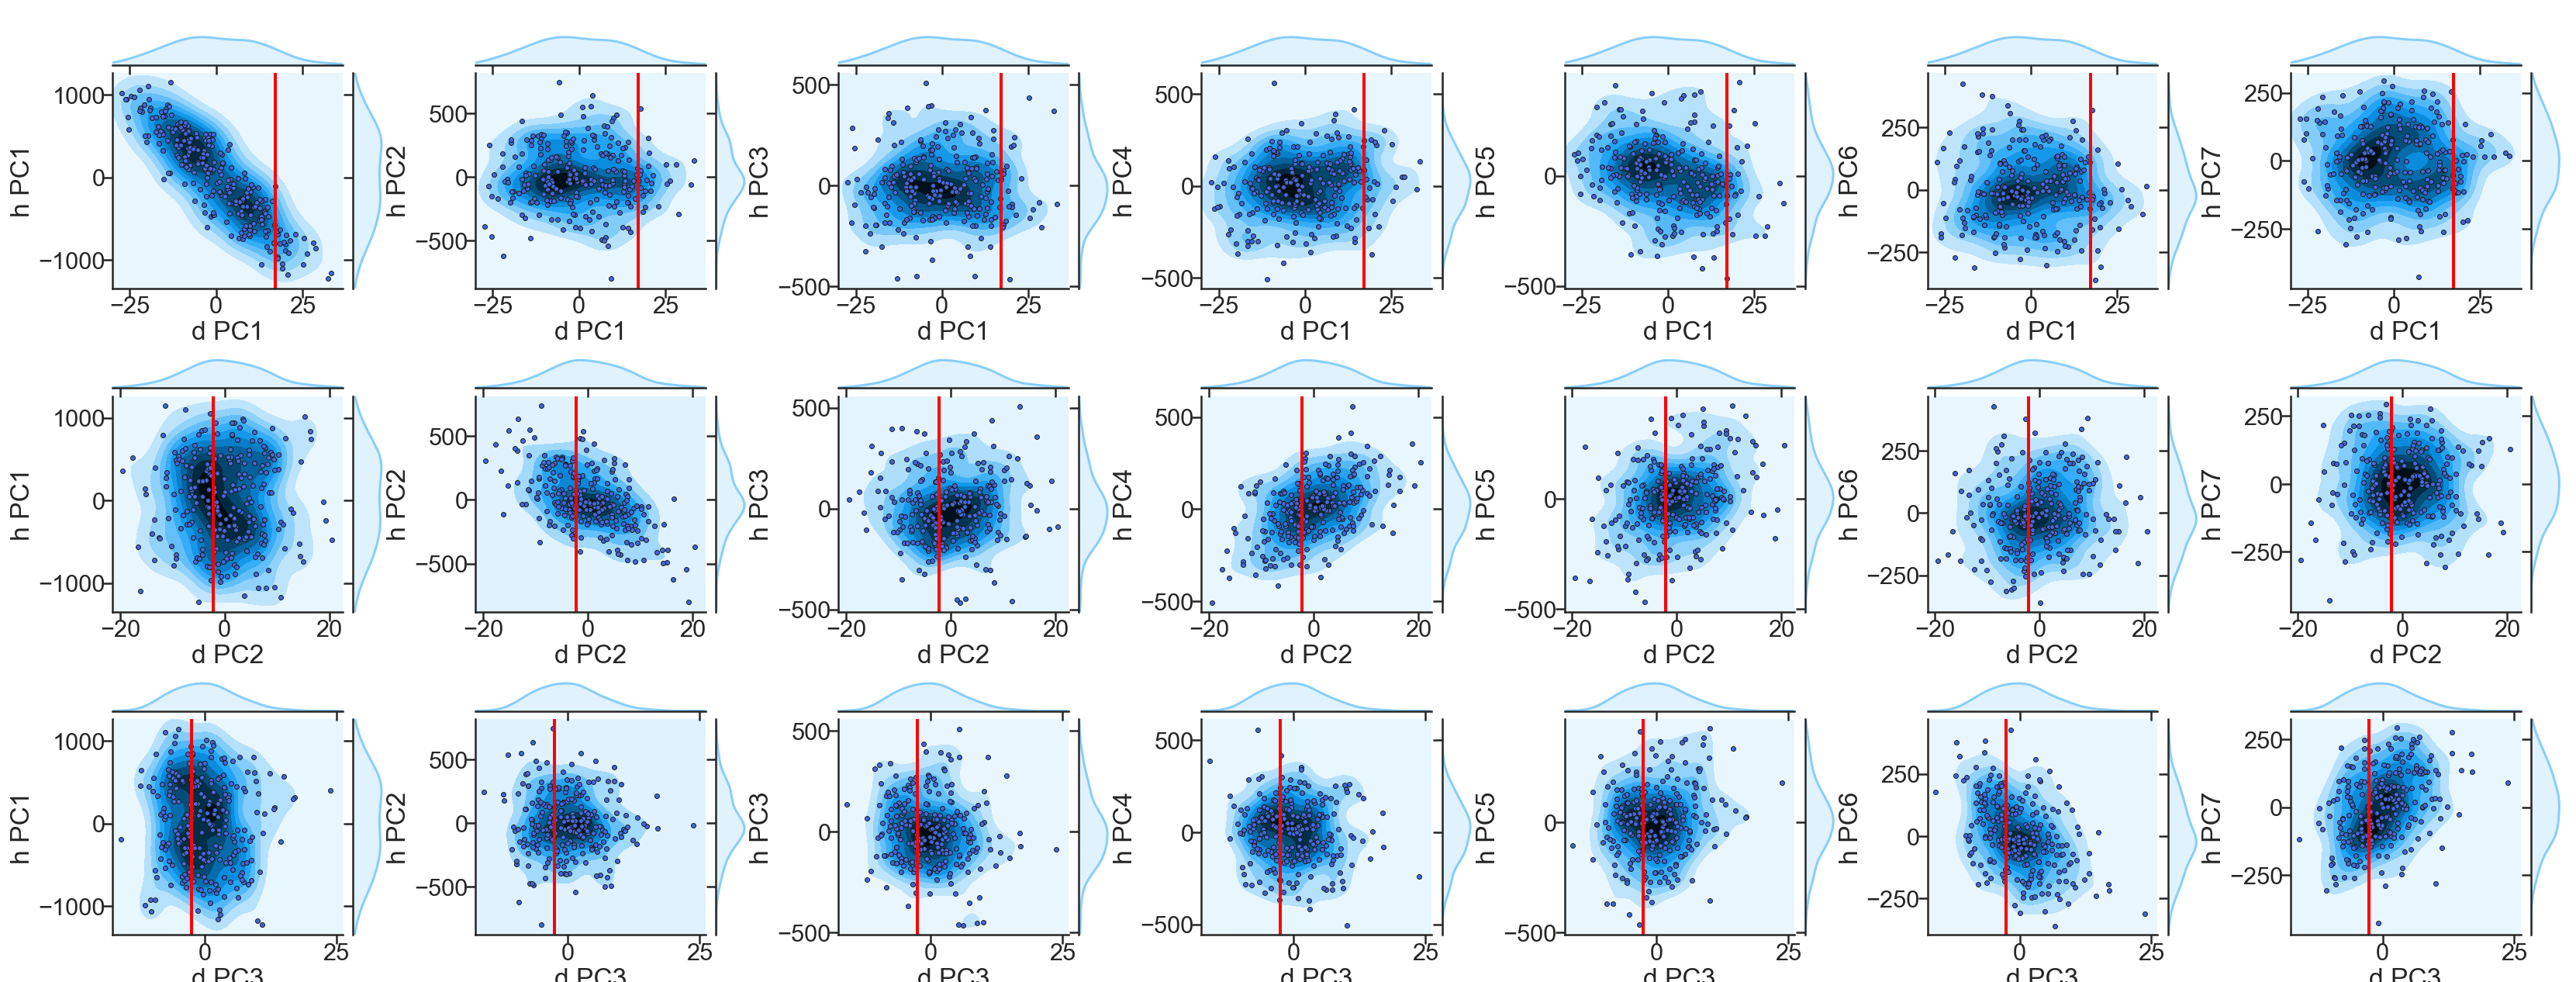

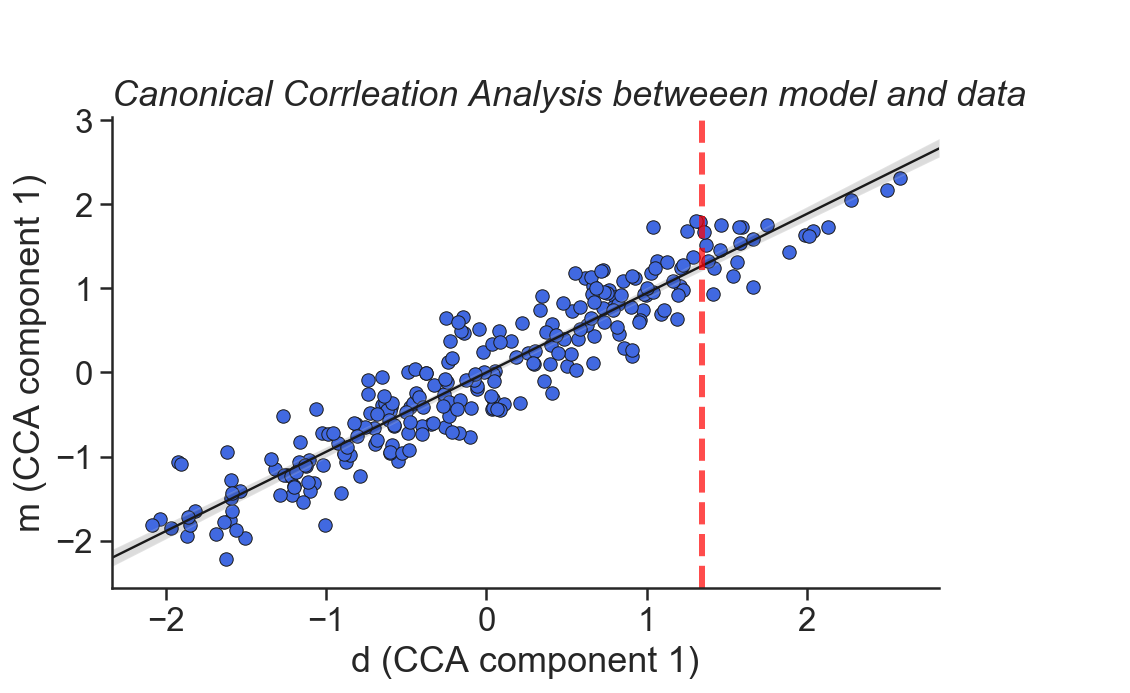

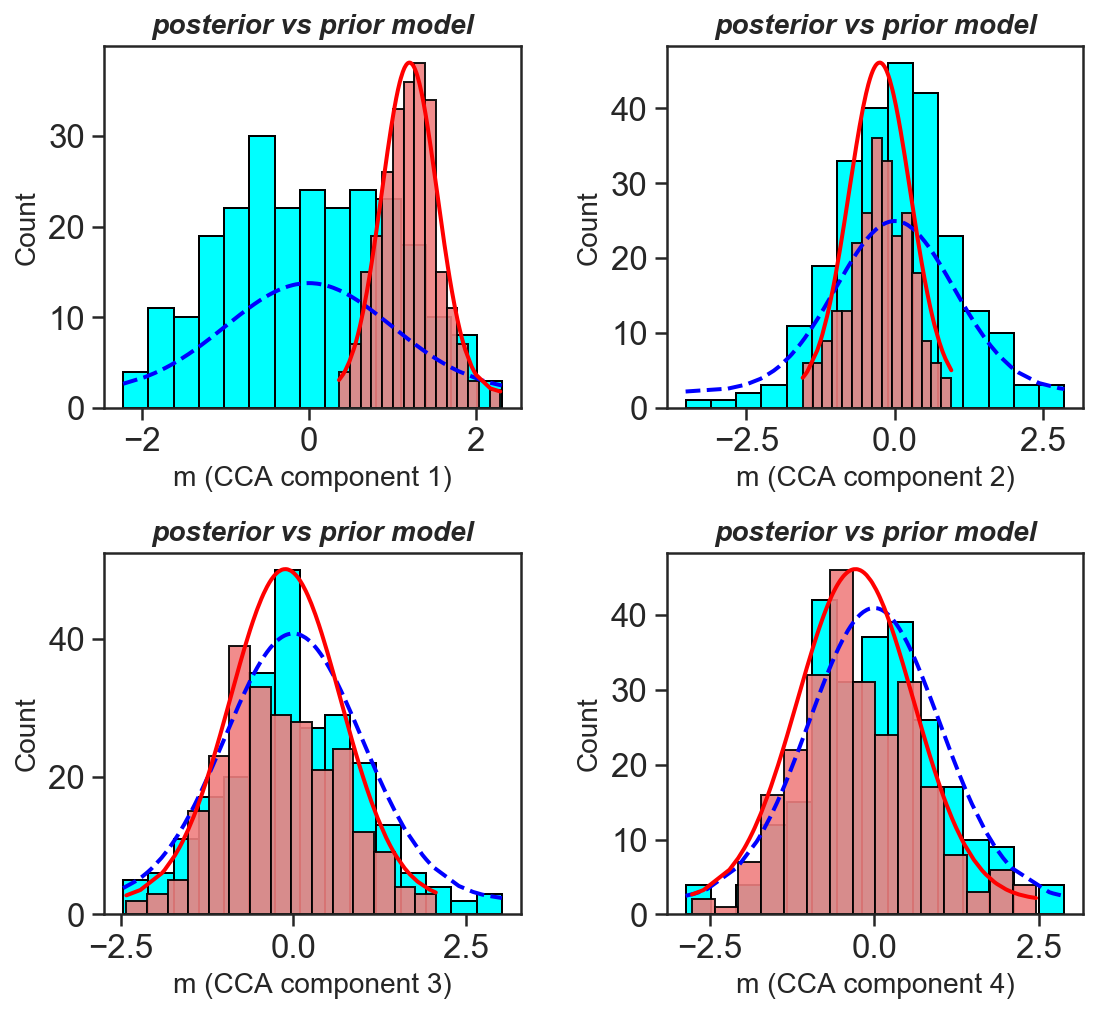

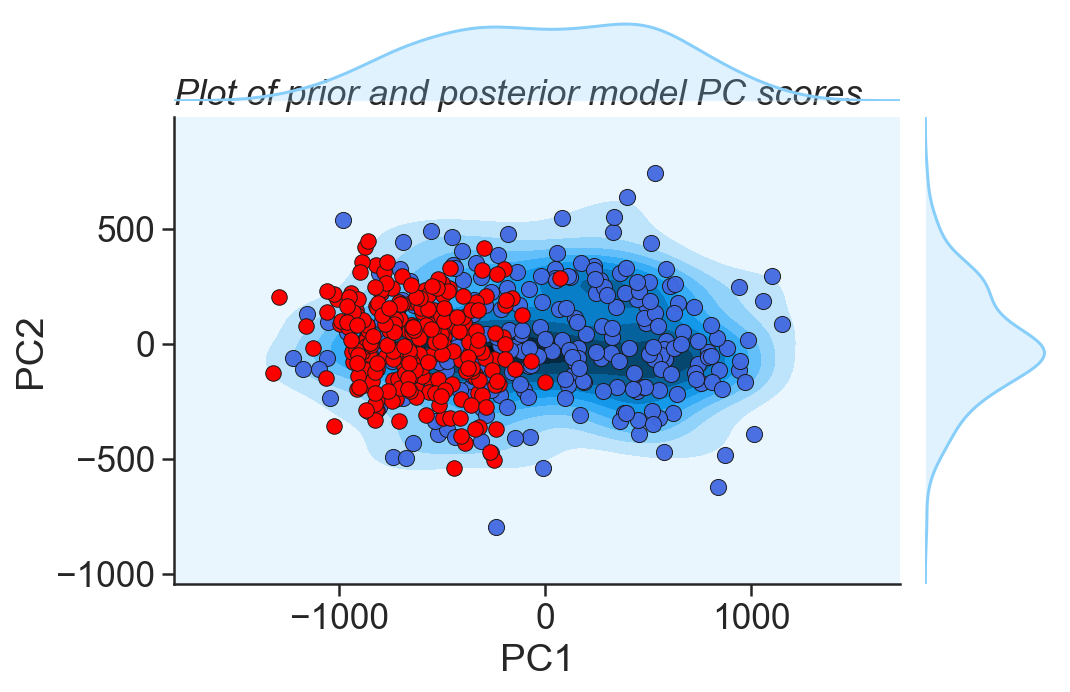

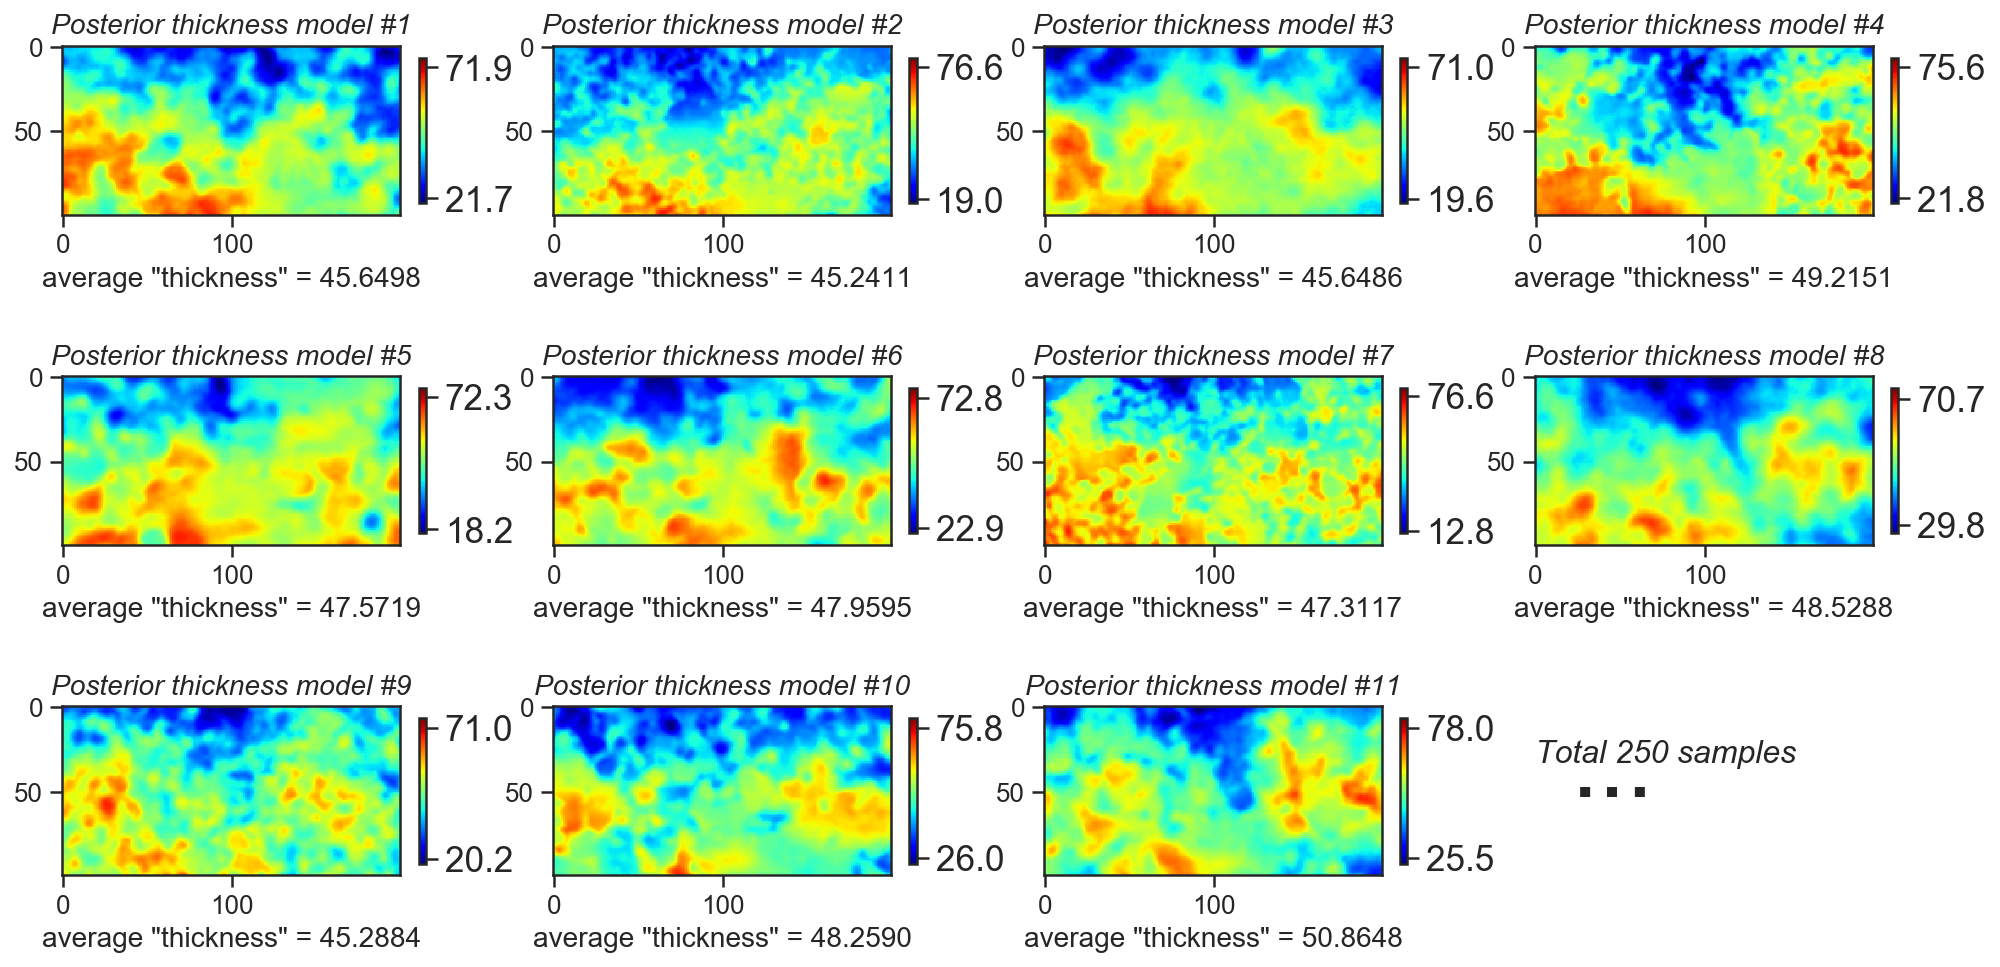

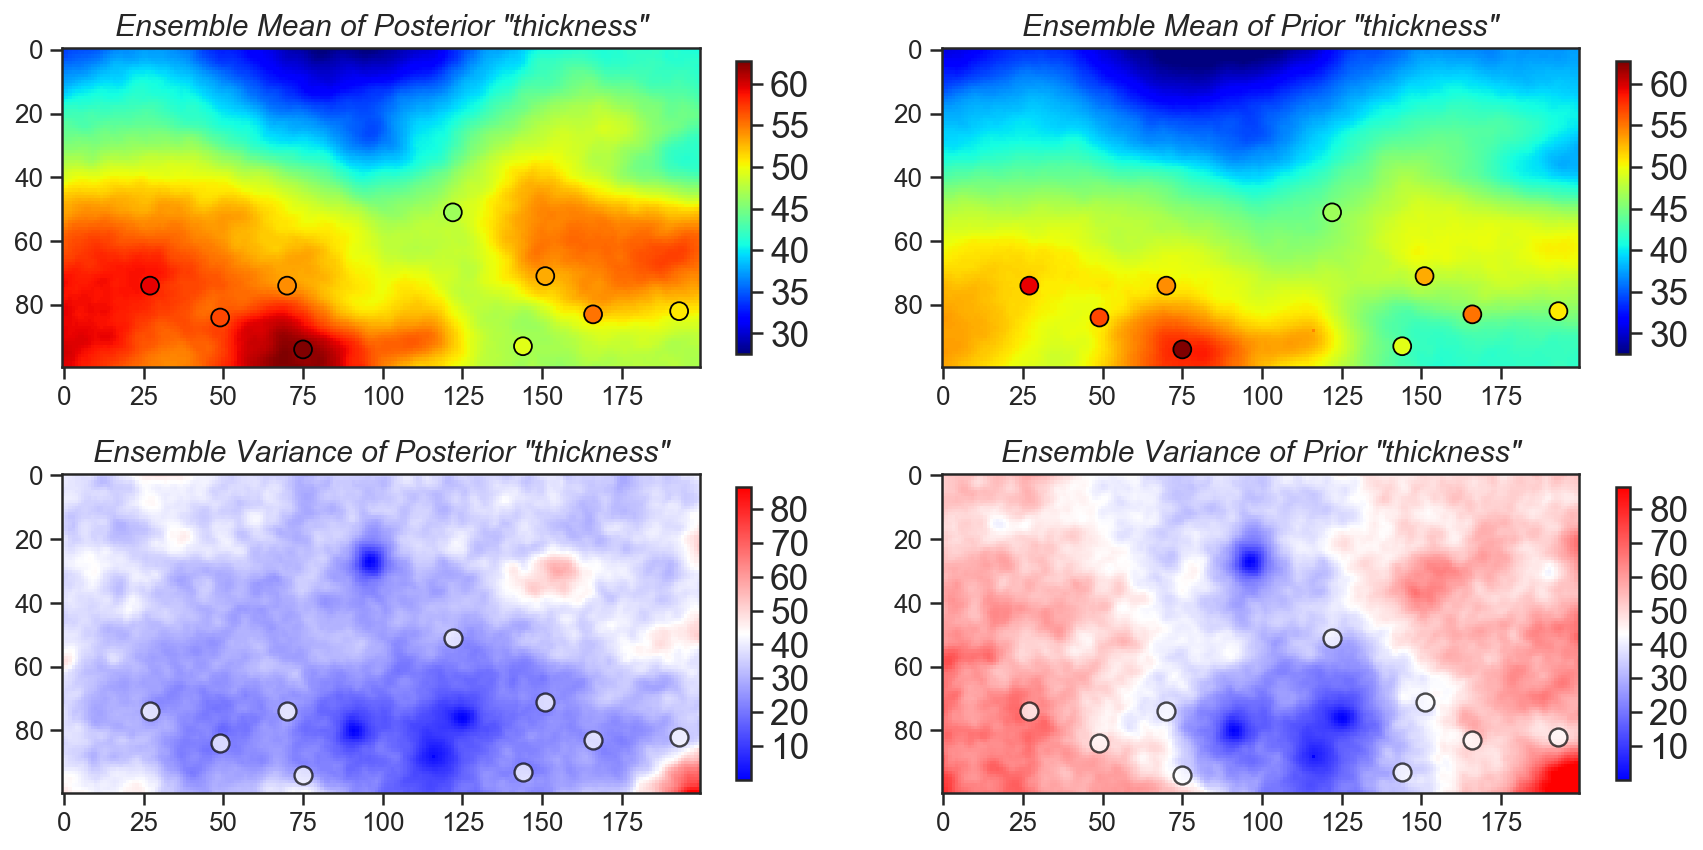

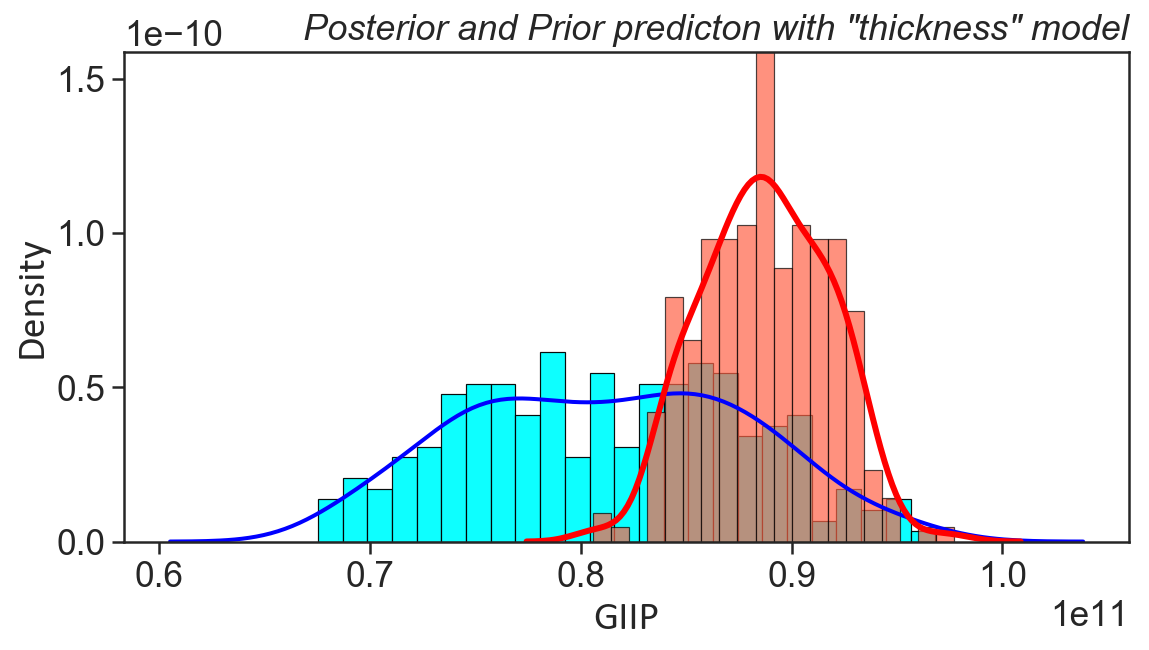

In [3]:
Auto_BEL(pri_m_samples_dir, model_names, model_types, mgl, samples_size, x_dim, \
         y_dim, z_dim, grid_h_resolution, dobs_file)